In [1]:
!pip install keras_tuner --upgrade

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras_tuner.tuners import GridSearch, RandomSearch
import matplotlib.pyplot as plt

In [3]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


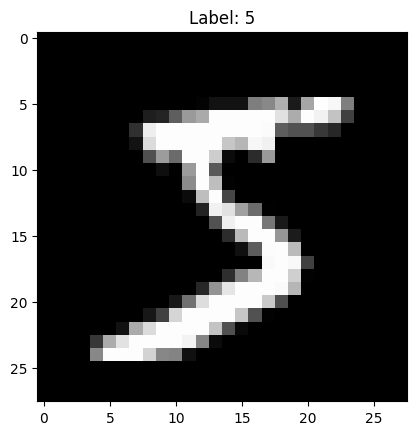

In [5]:
image_index = 0
plt.imshow(train_images[image_index], cmap='gray')
plt.title('Label: {}'.format(train_labels[image_index]))
plt.show()

In [6]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int("Num_of_Kernel_1", min_value=32, max_value=128, step=32), (3, 3), activation="relu", input_shape=(28,28,1)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(hp.Int("Num_of_Kernel_2", min_value=32, max_value=128, step=32), (3, 3), activation="relu"))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(hp.Int("Num_of_Kernel_3", min_value=32, max_value=128, step=32), (3, 3), activation="relu"))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer=hp.Choice("optimizer", values=["adam", "rmsprop"]), loss="categorical_crossentropy", metrics=["accuracy"])

    return model


In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Find Hyper Parameter

In [8]:
tuner = GridSearch(build_model, objective='val_accuracy', max_trials=128, executions_per_trial=1,)
tuner.search(x=train_images, y=train_labels, epochs=3, validation_split=0.1)

Trial 128 Complete [00h 00m 28s]
val_accuracy: 0.9928333163261414

Best val_accuracy So Far: 0.9928333163261414
Total elapsed time: 01h 13m 15s


In [11]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 127 summary
Hyperparameters:
Num_of_Kernel_1: 128
Num_of_Kernel_2: 128
Num_of_Kernel_3: 128
optimizer: rmsprop
Score: 0.9928333163261414

Trial 022 summary
Hyperparameters:
Num_of_Kernel_1: 32
Num_of_Kernel_2: 96
Num_of_Kernel_3: 128
optimizer: adam
Score: 0.9926666617393494

Trial 055 summary
Hyperparameters:
Num_of_Kernel_1: 64
Num_of_Kernel_2: 96
Num_of_Kernel_3: 128
optimizer: rmsprop
Score: 0.9926666617393494

Trial 021 summary
Hyperparameters:
Num_of_Kernel_1: 32
Num_of_Kernel_2: 96
Num_of_Kernel_3: 96
optimizer: rmsprop
Score: 0.9923333525657654

Trial 059 summary
Hyperparameters:
Num_of_Kernel_1: 64
Num_of_Kernel_2: 128
Num_of_Kernel_3: 64
optimizer: rmsprop
Score: 0.9921666383743286

Trial 117 summary
Hyperparameters:
Num_of_Kernel_1: 128
Num_of_Kernel_2: 96
Num_of_Kernel_3: 96
optimizer: rmsprop
Score: 0.9921666383743286

Trial 109 summary
Hyperparameter

In [12]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [13]:
best_hps.values

{'Num_of_Kernel_1': 128,
 'Num_of_Kernel_2': 128,
 'Num_of_Kernel_3': 128,
 'optimizer': 'rmsprop'}

In [14]:
# Build the best model
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(train_images, train_labels, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1277 - accuracy: 0.9600 - val_loss: 0.0777 - val_accuracy: 0.9802
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0501 - val_accuracy: 0.9858
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0301 - val_accuracy: 0.9935


In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy}")

# Summary of the model
model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9927
Test accuracy: 0.9926999807357788
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         147584  